## Metrrics to start with online retail Analysis
For an online retail, we can select our Metric as Monthly Sales Revenue




In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [5]:
tx_data = pd.read_table('C:\\Users\\Raghuram\\Desktop\\project\\000.txt',header=None,sep=",")

tx_data.columns=["date","cust_id","event","price","product_id","category"]
tx_data.head(5)


,date,cust_id,event,price,product_id,category
0,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests
1,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests
2,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT09IUWDFMX,women>outerwear>vests
3,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts
4,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts


In [6]:
print(tx_data.dtypes)
tx_data.shape


date          object
cust_id       object
event         object
price          int64
product_id    object
category      object
dtype: object


(7349575, 6)


# Extracting data related to purchase(event: buy)

  Given data is having 73495575 observations.For analysis extracting event 'buy' data having 9000+ observations

In [7]:
tx_data=tx_data.loc[tx_data['event'].isin(['buy'])]
print(tx_data.shape)
tx_data.head()

(9464, 6)


,date,cust_id,event,price,product_id,category
16796,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,buy,1999,TI778SH75SKEDFMX,men>shoes>boots
16797,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,buy,1499,TI778SH87SJSDFMX,men>shoes>boots
16798,2019-01-11,0cbc10e5-005a-4960-a7fb-28931bd82daf,buy,1199,TH934AT94SAVDFMX,women>outerwear>jackets
16799,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,buy,299,SQ017AT94NEVDFMX,men>activewear>tshirts
16800,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,buy,299,DO528AB27RRWDFMX,men>bottomwear>shorts


We have no. of customers who puchases products are 2819
Total no. of unique products ordered are 3656

In [8]:
tx_data.to_csv("C:\\Users\\Raghuram\\Desktop\\Python Project customer analytics\\cust_data.csv")

In [9]:
data=tx_data
cust_count=tx_data['cust_id'].value_counts()
prod_count=tx_data['product_id'].value_counts()
print(cust_count.head())
print(prod_count.head())
print(cust_count.shape)
prod_count.shape

50bb9727-5420-42a1-8605-73a5042d1c8b    125
223c59ce-99fc-4e0d-87a9-4156c87fd5d2    114
4d416d08-e2ef-4c1c-af4e-db84d78dc8a9     56
e76aff10-b325-46dc-949a-29848e1baef7     40
85bb6a6b-ae70-487b-a758-c93a54da0426     38
Name: cust_id, dtype: int64
TI778SH85SJUDFMX    129
TI778SH80SJZDFMX     69
TI778SH71SKIDFMX     38
ST089SH56SKXDFMX     35
LE063AB24EHVDFMX     26
Name: product_id, dtype: int64
(2819,)


(3656,)

In [10]:
tx_data.drop(["event","category"],axis=1,inplace=True)
tx_data.head()

,date,cust_id,price,product_id
16796,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1999,TI778SH75SKEDFMX
16797,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1499,TI778SH87SJSDFMX
16798,2019-01-11,0cbc10e5-005a-4960-a7fb-28931bd82daf,1199,TH934AT94SAVDFMX
16799,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,SQ017AT94NEVDFMX
16800,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,DO528AB27RRWDFMX


### We have all the crucial information we need:
•	date
•	customer id
•	price
•	product_id
With all these features:
Revenue = Active Customer Count ** Order Count ** Average Revenue per Order

To calculate Monthly Revenue purchase need to do data preprocessing..

In [11]:
tx_data.shape

(9464, 4)

In [12]:
import datetime
#converting the type of  Date Field from string to date.
tx_data['date'] = pd.to_datetime(tx_data['date'])

#creating day,Month field for the ease of reporting and visualization
tx_data['date_day']=tx_data['date'].dt.day
tx_data['Month'] = tx_data['date'].dt.month

In [13]:
tx_data.head()

,date,cust_id,price,product_id,date_day,Month
16796,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1999,TI778SH75SKEDFMX,18,1
16797,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1499,TI778SH87SJSDFMX,18,1
16798,2019-01-11,0cbc10e5-005a-4960-a7fb-28931bd82daf,1199,TH934AT94SAVDFMX,11,1
16799,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,SQ017AT94NEVDFMX,18,1
16800,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,DO528AB27RRWDFMX,18,1


In [14]:
#calculate Revenue/Sales for each row and create a new dataframe with YearMonth - Revenue columns
tx_df = tx_data.groupby(['Month','date_day'])['price'].sum().reset_index()
tx_df.head()

,Month,date_day,price
0,1,1,1225
1,1,2,8357
2,1,3,12765
3,1,4,5976
4,1,5,4290


### total_sales price distribution day wise, Most of the days transaction happen less than 50000Rs/-

C:\Users\Raghuram\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



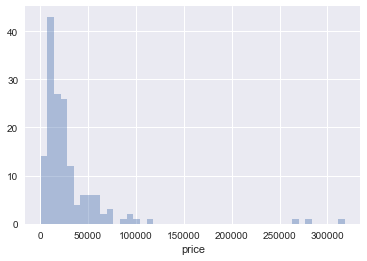

In [15]:

sns.distplot(tx_df["price"],kde=False)

### Most of the times all the months having transactions with price < 150000 but only in 5 th month trasaction are more than 250000

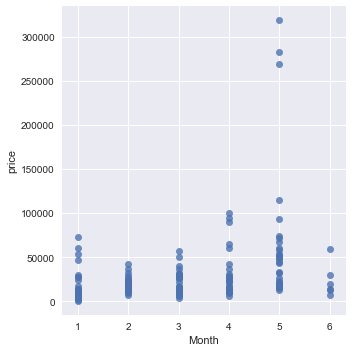

In [16]:
sns.lmplot('Month', 'price', 
           data=tx_df,palette="Set1",
           fit_reg=False)


In [35]:
td=tx_data.groupby(['Month'])['price'].sum().reset_index()
td

,Month,price
0,1,559367
1,2,568819
2,3,662641
3,4,882597
4,5,2041727
5,6,143296


### In the month of may had more order values and sudden decay in june. Further analysis need to be done deeply to know reasons june month has less purchase prices/sales.

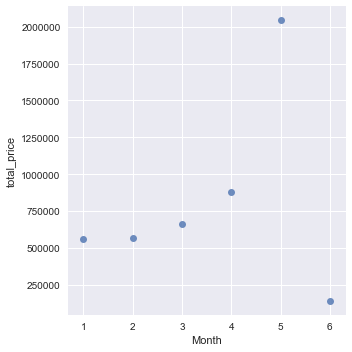

In [69]:
sns.lmplot('Month', 'price', 
           data=td,palette="Set1",
           fit_reg=False)


### By looking at the frequency of transactions by the customers, most of the customers did transations less than 5 times. Graph is positively skewed.

(array([ 1656.,   542.,   315.,    68.,    92.,    54.,    17.,    27.,
           12.,     6.]),
 array([  1. ,   2.7,   4.4,   6.1,   7.8,   9.5,  11.2,  12.9,  14.6,
         16.3,  18. ]),
 <a list of 10 Patch objects>)

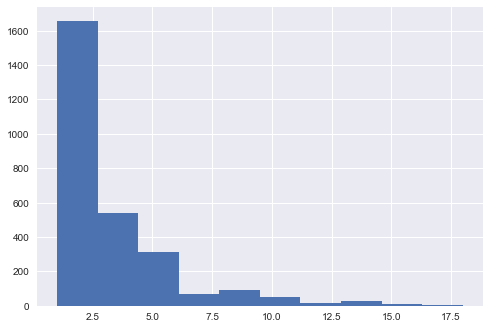

In [73]:
cus_freq=pd.DataFrame(tx_data["cust_id"].value_counts(),columns=["cust_id","no.trans"])
plt.hist(tx_data["cust_id"].value_counts()[30:,])


## Statiscs for customers frequency count
1. 75% of the customers they buought products less than 4 times. (needs to increase the frequent purchase by customers to get increase in sales as there are more customers.
2. 25% of the customers bought products more than 4 times i.e. between 4 to 125 times.
3. So they are more frequently purchasing products they should be important for our business we need to retain then if    they seems to be leave by looking at the frequency of purchase decreases.
4. There are total 2819 customers ordered the products in the total dataset of having 8Lakh unique customers
   over who viewed, addto cart and buy events.

In [72]:
tx_data["cust_id"].value_counts().describe()

count    2819.000000
mean        3.357219
std         4.798616
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       125.000000
Name: cust_id, dtype: float64

## Monthly active customers

below bargraph shows that there are more customers who did purchases in the month of may


In [78]:
#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_data.groupby('Month')['cust_id'].nunique().reset_index()

#print the dataframe
tx_monthly_active

,Month,cust_id
0,1,419
1,2,392
2,3,519
3,4,462
4,5,1137
5,6,91


<Container object of 6 artists>

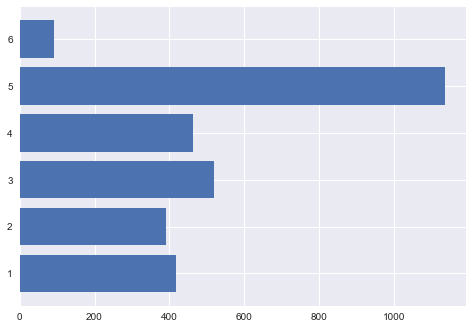

In [79]:
plt.barh(tx_monthly_active['Month'],tx_monthly_active['cust_id'])

#### Over all monthly average sales
From the bar chart below shows average monthly sales price gradually increases till 4th month and decay in 5 th month

In [83]:
# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = tx_data.groupby('Month')['price'].mean().reset_index()

#print the dataframe
tx_monthly_order_avg


,Month,price
0,1,411.601913
1,2,564.304563
2,3,475.011470
3,4,624.184583
4,5,517.941908
5,6,414.150289


<Container object of 6 artists>

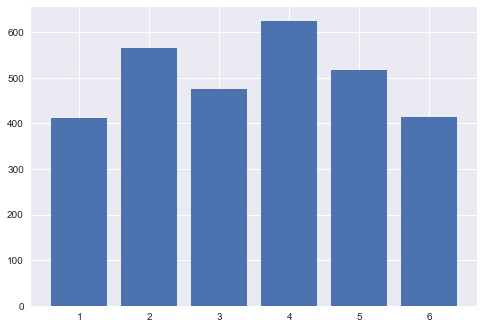

In [86]:
plt.bar(tx_monthly_order_avg['Month'],tx_monthly_order_avg['price'])


We have looked at our major metrics. Of course there are many more and it varies across industries. 
Let’s continue investigating some other important metrics:
#### New Customer Ratio: 
     A good indicator of if we are losing our existing customers or unable to attract new ones.
     A new customer is whoever did his/her first purchase in the time window we defined.
#### Retention Rate:  
     Retention Rate indicates how many customers we retain over specific time window. 
     Below is showing monthly retention rate of customers.

In [106]:
#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = tx_data.groupby('cust_id').date.min().reset_index()
tx_min_purchase.columns = ['cust_id','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
tx_data2 = pd.merge(tx_data, tx_min_purchase, on='cust_id')

#tx_data2.to_csv("C:\\Users\\Raghuram\\Desktop\\Python Project customer analytics\\min_purchase_date.csv")

In [119]:
tx_data2.head()

,date,cust_id,price,product_id,date_day,Month,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1999,TI778SH75SKEDFMX,18,1,2019-01-18,201901,New
1,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1499,TI778SH87SJSDFMX,18,1,2019-01-18,201901,New
2,2019-01-11,0cbc10e5-005a-4960-a7fb-28931bd82daf,1199,TH934AT94SAVDFMX,11,1,2019-01-11,201901,New
3,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,SQ017AT94NEVDFMX,18,1,2019-01-18,201901,New
4,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,DO528AB27RRWDFMX,18,1,2019-01-18,201901,New


In [123]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected date Year Month
tx_data2['UserType'] = 'New'
tx_data2.loc[tx_data2['date']>tx_data2['MinPurchaseDate'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_data2.groupby(['Month','UserType'])['price'].sum().reset_index()

In [118]:
tx_data2

,date,cust_id,price,product_id,date_day,Month,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1999,TI778SH75SKEDFMX,18,1,2019-01-18,201901,New
1,2019-01-18,05fa0274-07ed-424f-9930-9e00a181a57b,1499,TI778SH87SJSDFMX,18,1,2019-01-18,201901,New
2,2019-01-11,0cbc10e5-005a-4960-a7fb-28931bd82daf,1199,TH934AT94SAVDFMX,11,1,2019-01-11,201901,New
3,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,SQ017AT94NEVDFMX,18,1,2019-01-18,201901,New
4,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,299,DO528AB27RRWDFMX,18,1,2019-01-18,201901,New
5,2019-01-18,1256d1c8-feae-4226-871a-b90e7d918ee0,329,PH184AT97GFYDFMX,18,1,2019-01-18,201901,New
6,2019-01-08,16f9603d-50c1-4115-903d-e28660746711,299,GO016AT78BJTDFMX,8,1,2019-01-08,201901,New
7,2019-01-08,16f9603d-50c1-4115-903d-e28660746711,349,ZO302AT17BAODFMX,8,1,2019-01-08,201901,New
8,2019-01-08,16f9603d-50c1-4115-903d-e28660746711,349,ZO302AT18BANDFMX,8,1,2019-01-08,201901,New
9,2019-01-08,16f9603d-50c1-4115-903d-e28660746711,299,GO016AT39BLGDFMX,8,1,2019-01-08,201901,New


Revenue per month for New and Existing customers

In [124]:
tx_user_type_revenue

,Month,UserType,price
0,1,Existing,46901
1,1,New,512466
2,2,Existing,102948
3,2,New,465871
4,3,Existing,103240
5,3,New,559401
6,4,Existing,165009
7,4,New,717588
8,5,Existing,373736
9,5,New,1667991


From the below plot we can say that the average sales quite more than the existing customers in each month compared 
to New customers in that month. Hence Need retention on existing customers to gain more retention rate.
Graph show positive increase of sales for both new and existing customers.

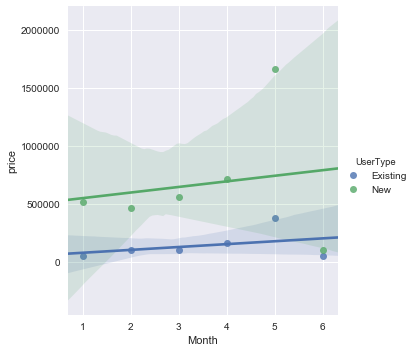

In [160]:
sns.lmplot(x='Month',y='price',data=tx_user_type_revenue,hue='UserType')


### New Customer Ratio

In [236]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_data2.query("UserType == 'New'").groupby(['Month'])['cust_id'].nunique()/(tx_data2.query("UserType == 'Existing'").groupby(['Month'])['cust_id'].nunique()+tx_data2.query("UserType == 'New'").groupby(['Month'])['cust_id'].nunique()) 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

#print the dafaframe
tx_user_ratio




,Month,cust_id
0,1,0.935268
1,2,0.880096
2,3,0.874307
3,4,0.873706
4,5,0.871020
5,6,0.747368


#### Monthly Customer Retention Rate
customer retention rate is the percentage of customers you keep relative to the number you had at the start of your period. This does not count new customers. It is the reverse of customer churn.

There are three pieces of information you need to calculate customer retention:

Number of customer at the end of a period (E)

Number of new customers acquired during that period (N)

Number of customers at the start of that period (S)

Monthly Retention Rate = ((E-N)/S)*100

In [348]:
#tx_data2.groupby(['Month'])['UserType'=='New'].count()
#=tx_data2[['date','Month','UserType']]

df = pd.get_dummies(tx_data2['UserType']).reindex(columns=tx_data2['UserType'].unique(), fill_value=0)
df=pd.concat([tx_data2,df],axis=1).reset_index()
df.head( )
tx_retention=pd.DataFrame(df.groupby(['Month'])['New'].sum())
df1=pd.DataFrame(df.groupby(['Month'])['Existing'].sum())
df1=df1.add_suffix('_count').reset_index()
#tx_retention.columns=['Month','New_count']
type(tx_retention)
tx_retention.index
tx_retention=tx_retention.add_suffix('_count').reset_index()
tx_retention=pd.concat([tx_retention,df1],axis=1)
tx_retention['Total']=tx_retention['New_count']+tx_retention['Existing_count']

tx_retention.loc[0,'retention_rate']=0
for row in range(1,len(tx_retention)):
    tx_retention.loc[row,'retention_rate']=(tx_retention.loc[row,'Total']-tx_retention.loc[row,'New_count'])/tx_retention.loc[row-1,'Total']*100
tx_retention    

,Month,New_count,Month,Existing_count,Total,retention_rate
0,1,1216.0,1,143.0,1359.0,0.000000
1,2,793.0,2,215.0,1008.0,15.820456
2,3,1170.0,3,225.0,1395.0,22.321429
3,4,1158.0,4,256.0,1414.0,18.351254
4,5,3204.0,5,738.0,3942.0,52.192362
5,6,215.0,6,131.0,346.0,3.323186


The Monthly retention rate is gradually increased from jan to may but in june there is a decay because we have few 
records 
of start of the month.

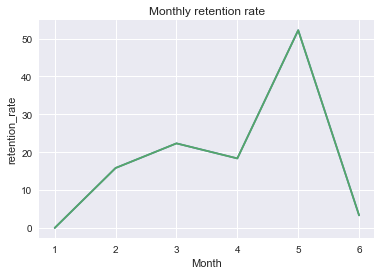

In [353]:
plt.plot('Month','retention_rate',data=tx_retention)
plt.xlabel('Month')
plt.ylabel('retention_rate')
plt.title('Monthly retention rate')
plt.show()